# How to : Wine recognition with MLP Classifier 
## (Sparse categorical Cross Entropy)

## Libraries import

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical
from keras.layers import Dense
from keras import Input, Model

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## Load the wine dataset

In [2]:
data = load_wine()
X = data.data
y = data.target

## Standard scaling

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dataset split

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, stratify=y)

## Define the model

In [5]:
num_classes = 3
inputs = Input(shape=(X.shape[1], ))
hidden_layers = Dense(6, activation="relu")(inputs)
output_layer = Dense(num_classes, activation="softmax")(hidden_layers)
classifier = Model(inputs=inputs, outputs=output_layer)

## Compile the model

In [6]:
classifier.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

## Model Summary

In [7]:
classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [8]:
history = classifier.fit(X_train, y_train, batch_size=10, epochs=120, validation_data=(X_val, y_val), verbose=0)

## Model Performance

### Accuracy and loss visualization

Text(0, 0.5, 'Loss')

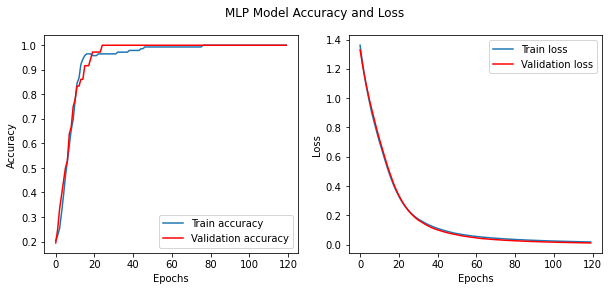

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("MLP Model Accuracy and Loss")

sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="Train accuracy", ax=ax1)
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="Validation accuracy", ax=ax1, color="red")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")

########

sns.lineplot(x=history.epoch, y=history.history['loss'], label="Train loss", ax=ax2)
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="Validation loss", ax=ax2, color="red")

ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")

### Validation set predictions

In [10]:
y_pred = classifier.predict(X_val)

2/2 [==============================] - 0s 2ms/step


In [11]:
y_pred[0]

array([1.5232179e-04, 2.6026664e-03, 9.9724507e-01], dtype=float32)

### From probabilities to classes...

In [12]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2], dtype=int64)

### Classification report

In [13]:
print(classification_report(y_val, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Confusion matrix 

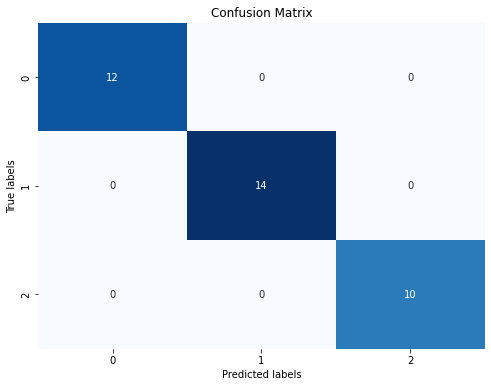

In [14]:
cm = confusion_matrix(y_val, y_pred_labels)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

**We can see that the model performs really well and converges around 100 Epochs.**